In [17]:
import plotly.express as px
import pandas as pd
import json
import geopandas as gpd
import numpy as np
import shapely.geometry
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

## Preprocessing

In [4]:
import os

px.set_mapbox_access_token(os.getenv("MAPBOX_KEY"))
transmission_fp = "data/pjm_transmission.geojson"
with open(transmission_fp) as f:
    gj = json.load(f)

geo_df = gpd.GeoDataFrame.from_features(
    gj["features"]
)

In [5]:

geo_df.head()

,geometry,OBJECTID,ID,TYPE,STATUS,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,OWNER,VOLTAGE,VOLT_CLASS,INFERRED,SUB_1,SUB_2,GlobalID,SHAPE_Length
0,"MULTILINESTRING ((-70.92855 42.54359, -70.9284...",1,100511,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, EIA 861, EIA 860",2016-11-08T00:00:00Z,IMAGERY,2017-03-27T00:00:00Z,NOT AVAILABLE,115.0,100-161,Y,WATERS RIVER,TAP136228,{F1500A3A-804A-4DA4-B6F6-BD0FBB2CF36D},0.000535
1,"MULTILINESTRING ((-82.96123 36.37699, -82.9609...",2,140809,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, EIA 860",2014-04-16T00:00:00Z,IMAGERY,2017-02-15T00:00:00Z,KINGSPORT POWER CO,161.0,100-161,Y,PHILLIPS BEND,JOHN SEVIER,{58C24E54-D758-4071-9EBF-D83BEB60C707},0.198755
2,"MULTILINESTRING ((-75.33407 43.08946, -75.3342...",3,140837,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, https://www9.nationalgridus.com/oasis...",2015-06-16T00:00:00Z,IMAGERY,2019-03-05T00:00:00Z,NIAGARA MOHAWK POWER CORP.,115.0,100-161,Y,TAP140359,TAP140373,{C40BBFF1-B1ED-4905-9FF6-1A80B7B422FC},0.042609
3,"MULTILINESTRING ((-89.93728 30.00905, -89.9377...",4,140811,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap",2014-06-20T00:00:00Z,IMAGERY,2017-03-20T00:00:00Z,"ENTERGY NEW ORLEANS, LLC",115.0,100-161,Y,GENTILLY ROAD,MICHOUD STATION,{F09483E3-5419-4B94-AAC5-A6450F2452C4},0.120183
4,"MULTILINESTRING ((-90.56609 41.61256, -90.5646...",5,140813,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, EIA 860",2016-10-04T00:00:00Z,IMAGERY/OTHER,2018-05-09T00:00:00Z,MIDAMERICAN ENERGY CO,161.0,100-161,Y,UNKNOWN137689,TAP137690,{36AC4F5E-AD18-47C2-BB7D-8BA64B7FA822},0.069155


In [6]:
cost_fp = "data/pjm_july_lmp.csv"
cost_df = pd.read_csv(cost_fp)

In [7]:
cost_df.head()

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,voltage,equipment,type,zone,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
0,8/1/2024 3:00:00 AM,7/31/2024 11:00:00 PM,1,PJM,NaN,NaN,ZONE,NaN,46.059167,46.157942,0.063465,0.035310,32.15,32.162377,-0.042195,0.054572
1,8/1/2024 3:00:00 AM,7/31/2024 11:00:00 PM,51205,BRANDONSH,NaN,NaN,AGGREGATE,NaN,46.059167,123.459167,76.935000,0.465000,32.15,48.810000,15.710000,0.950000
2,8/1/2024 3:00:00 AM,7/31/2024 11:00:00 PM,51206,BRUNSWICK,NaN,NaN,AGGREGATE,NaN,46.059167,47.787500,2.490000,-0.761667,32.15,26.120000,-5.980000,-0.050000
3,8/1/2024 3:00:00 AM,7/31/2024 11:00:00 PM,51211,COOKSTOWN,NaN,NaN,AGGREGATE,NaN,46.059167,49.852500,4.220000,-0.426667,32.15,26.390000,-5.980000,0.220000
4,8/1/2024 3:00:00 AM,7/31/2024 11:00:00 PM,51214,DOVER,NaN,NaN,AGGREGATE,NaN,46.059167,53.267500,7.693333,-0.485000,32.15,27.020000,-5.090000,-0.040000


In [26]:
geo_cost_df = geo_df.merge(cost_df, left_on="SUB_1", right_on="pnode_name", how="inner")

In [12]:
pd.set_option('display.max_columns', None)

In [16]:
geo_cost_df["geometry"]

AttributeError: 'MultiLineString' object has no attribute 'linestring'

In [13]:
geo_cost_df.head()

,geometry,OBJECTID,ID,TYPE,STATUS,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,OWNER,VOLTAGE,VOLT_CLASS,INFERRED,SUB_1,SUB_2,GlobalID,SHAPE_Length,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,voltage,equipment,type,zone,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
0,"MULTILINESTRING ((-79.79607 40.80178, -79.7971...",210,141063,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap, EIA 860",2015-05-22T00:00:00Z,IMAGERY,2018-03-27T00:00:00Z,WEST PENN POWER CO,138.0,100-161,Y,CABOT,BUTLER,{7B000FBB-D12E-45EE-A9C7-F6EBF648412A},0.119274,8/1/2024 3:00:00 AM,7/31/2024 11:00:00 PM,5022434,CABOT,NaN,NaN,EHV,NaN,46.059167,40.462500,-3.592500,-2.004167,32.15,28.27,-2.84,-1.04
1,"MULTILINESTRING ((-79.79607 40.80178, -79.7971...",210,141063,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap, EIA 860",2015-05-22T00:00:00Z,IMAGERY,2018-03-27T00:00:00Z,WEST PENN POWER CO,138.0,100-161,Y,CABOT,BUTLER,{7B000FBB-D12E-45EE-A9C7-F6EBF648412A},0.119274,8/1/2024 2:00:00 AM,7/31/2024 10:00:00 PM,5022434,CABOT,NaN,NaN,EHV,NaN,69.558333,32.405833,-33.726667,-3.425833,36.66,31.29,-4.28,-1.09
2,"MULTILINESTRING ((-79.79607 40.80178, -79.7971...",210,141063,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap, EIA 860",2015-05-22T00:00:00Z,IMAGERY,2018-03-27T00:00:00Z,WEST PENN POWER CO,138.0,100-161,Y,CABOT,BUTLER,{7B000FBB-D12E-45EE-A9C7-F6EBF648412A},0.119274,8/1/2024 1:00:00 AM,7/31/2024 9:00:00 PM,5022434,CABOT,NaN,NaN,EHV,NaN,95.246667,76.716667,-14.310000,-4.220000,47.95,38.05,-8.40,-1.50
3,"MULTILINESTRING ((-79.79607 40.80178, -79.7971...",210,141063,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap, EIA 860",2015-05-22T00:00:00Z,IMAGERY,2018-03-27T00:00:00Z,WEST PENN POWER CO,138.0,100-161,Y,CABOT,BUTLER,{7B000FBB-D12E-45EE-A9C7-F6EBF648412A},0.119274,8/1/2024 12:00:00 AM,7/31/2024 8:00:00 PM,5022434,CABOT,NaN,NaN,EHV,NaN,54.798333,42.017500,-10.433333,-2.347500,56.55,44.47,-10.15,-1.93
4,"MULTILINESTRING ((-79.79607 40.80178, -79.7971...",210,141063,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap, EIA 860",2015-05-22T00:00:00Z,IMAGERY,2018-03-27T00:00:00Z,WEST PENN POWER CO,138.0,100-161,Y,CABOT,BUTLER,{7B000FBB-D12E-45EE-A9C7-F6EBF648412A},0.119274,7/31/2024 11:00:00 PM,7/31/2024 7:00:00 PM,5022434,CABOT,NaN,NaN,EHV,NaN,119.250833,67.065000,-47.168333,-5.017500,74.88,55.64,-16.92,-2.32


In [8]:
from tqdm import tqdm

In [24]:
avg_geo_cost_df = geo_cost_df.groupby(["ID", "pnode_id", "pnode_name", "SUB_1", "SUB_2", "VOLTAGE", "geometry"]).mean("congestion_price_rt")

In [30]:
avg_geo_cost_df = avg_geo_cost_df.reset_index()

In [ ]:
avg_geo_cost_df["lats"] = avg_geo_cost_df["geometry"].apply()

In [79]:
avg_geo_cost_df.head()

,ID,pnode_id,pnode_name,SUB_1,SUB_2,VOLTAGE,geometry,OBJECTID,SHAPE_Length,voltage,equipment,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
0,100068,52466,SUNBURY,SUNBURY,TAP147510,69.0,"MULTILINESTRING ((-76.75259 40.80629, -76.7581...",17730.0,0.084537,NaN,NaN,42.11986,30.993357,-9.841048,-1.285455,39.684395,29.543737,-9.560309,-0.580349
1,100162,35010341,CHICKAHOMINY,CHICKAHOMINY,LANEXA,230.0,"MULTILINESTRING ((-76.91199 37.42017, -76.9126...",17812.0,0.255909,NaN,NaN,42.11986,42.800513,1.100431,-0.419778,39.684395,42.710094,2.991290,0.034409
2,100328,35010383,LEXINGTON,LEXINGTON,TAP147650,115.0,"MULTILINESTRING ((-79.41256 37.79913, -79.4117...",17944.0,0.070473,NaN,NaN,42.11986,39.839418,-1.154061,-1.126381,39.684395,38.390148,-0.284462,-1.009785
3,100398,35010379,DOOMS,DOOMS,VALLEY,500.0,"MULTILINESTRING ((-78.8491 38.10703, -78.84559...",18426.0,0.276751,NaN,NaN,42.11986,40.484418,-0.710082,-0.925361,39.684395,38.883616,-0.092890,-0.707890
4,100840,52445,BRIGHTON,BRIGHTON,MOUNT ZION,230.0,"MULTILINESTRING ((-77.10354 39.19044, -77.1031...",18315.0,0.068176,NaN,NaN,42.11986,52.966967,9.973856,0.873250,39.684395,50.846949,9.557473,1.605081


In [30]:
geo_cost_df.where(geo_cost_df["VOLTAGE"] > 0)["VOLTAGE"].shape

(383904,)

In [27]:
geo_cost_df.shape

(383904, 35)

In [21]:
geo_cost_df["VOLTAGE"].min()

np.float64(-999999.0)

(array([ 27528.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 356376.]),
 array([-9.999990e+05, -8.999226e+05, -7.998462e+05, -6.997698e+05,
        -5.996934e+05, -4.996170e+05, -3.995406e+05, -2.994642e+05,
        -1.993878e+05, -9.931140e+04,  7.650000e+02]),
 <BarContainer object of 10 artists>)

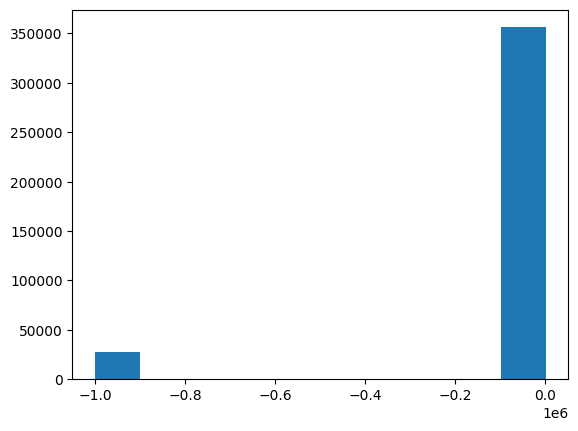

In [18]:
plt.hist(geo_cost_df["VOLTAGE"])

## Plotly

In [77]:
lats = []
lngs = []
names = []
costs = []

for _, row in avg_geo_cost_df.iterrows():
    feature = row.geometry
    name = row.ID
    cost = row.congestion_price_da

    if isinstance(feature, shapely.geometry.linestring.LineString):
        linestrings = [feature]
    elif isinstance(feature, shapely.geometry.multilinestring.MultiLineString):
        linestrings = feature.geoms
    else:
        raise ValueError(f"Invalid feature type: {feature}")        
    
    for linestring in linestrings:
        x_coords, y_coords = linestring.xy
        lats += list(y_coords) + [None]
        lngs += list(x_coords) + [None]
        names += [name] * len(y_coords) + [None]
        costs += [cost] * len(y_coords) + [None]

fig = px.line_geo(lat=lats, lon=lngs, hover_name=names, projection='natural earth')

## Folium

In [81]:
import branca.colormap as cm

costs = avg_geo_cost_df["congestion_price_da"]
min_value, max_value = min(costs), max(costs)
colormap = cm.linear.YlOrRd_09.scale(min_value, max_value)

In [114]:
import folium

# Initialize a Folium map
m = folium.Map(location=[39.653806, -77.152707], zoom_start=7)

In [115]:
# Add the colormap legend to the map
colormap.add_to(m)

In [116]:
for _, row in avg_geo_cost_df.iterrows():
    linestrings = row["geometry"]
    name = row["ID"]
    cost = row["congestion_price_da"]

    for linestring in linestrings.geoms:
        locations = np.flip(np.stack(linestring.xy, axis=1), axis=1)
        color = colormap(cost)  # Get color based on value
        folium.PolyLine(locations=locations, color=color, weight=5).add_to(m)

In [117]:
m

## Duck DB Analysis

In [15]:
import duckdb
import pandas as pd
# No need to import duckdb_engine
#  jupysql will auto-detect the driver needed based on the connection string!

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

/Users/cd/projects/sfc/venv-sfc/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



In [16]:
%config SqlMagic.displaylimit = 1000

In [17]:
%sql duckdb:///:memory:

Connecting to 'duckdb:///:memory:'

In [36]:
%%sql
SELECT COUNT(DISTINCT SUB_1)
FROM 'data/pjm_july_lmp.csv'
INNER JOIN 'data/pjm_transmission.csv' ON pnode_name = SUB_1;

Running query in 'duckdb:///:memory:'

count_star()
383904


In [45]:
%%sql
SELECT  * from 'data/pjm_transmission.geojson'
LIMIT 10;

Running query in 'duckdb:///:memory:'

RuntimeError: If using snippets, you may pass the --with argument explicitly.
For more details please refer: https://jupysql.ploomber.io/en/latest/compose.html#with-argument


Original error message from DB driver:
(duckdb.duckdb.CatalogException) Catalog Error: Table with name data/pjm_transmission.geojson does not exist!
Did you mean "pg_am"?
LINE 1: SELECT  * from 'data/pjm_transmission.geojson'
                       ^
[SQL: SELECT  * from 'data/pjm_transmission.geojson'
LIMIT 10;]
(Background on this error at: https://sqlalche.me/e/20/f405)

If you need help solving this issue, send us a message: https://ploomber.io/community


In [43]:
%%sql
SELECT COUNT(*)
FROM 'data/pjm_july_lmp.csv'
INNER JOIN 'data/pjm_transmission.csv' ON pnode_name = SUB_1;

SyntaxError: invalid syntax (3077490013.py, line 1)

In [ ]:
%%sql
SELECT COUNT(*)
FROM 'data/pjm_july_lmp.csv'
INNER JOIN 'data/pjm_transmission.csv' ON pnode_name = SUB_1;

In [20]:
%%sql
with q as (
    SELECT ID, pnode_id, pnode_name, SUB_1, SUB_2, pjm_transmission.VOLTAGE, avg(congestion_price_rt)
    FROM 'data/pjm_july_lmp.csv'
    INNER JOIN 'data/pjm_transmission.csv' ON pnode_name = SUB_1
    GROUP BY ID, pnode_id, pnode_name, SUB_1, SUB_2, pjm_transmission.VOLTAGE
)
SELECT COUNT(*) FROM q;

Running query in 'duckdb:///:memory:'

count_star()
516
